In [47]:
import matplotlib.pyplot as plt
import numpy as np
from subprocess import call
import re
from collections import OrderedDict
import math

def Clock2NanoSec(clock):
    return clock/2.801

def Clock2USec(clock):
    return clock/2801

def SigmaFilter(data):
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    return data

def LoadData(filepath):
    data = OrderedDict()
    for line in open(filepath).readlines():
        fields = line.split(":\t")
        samples = data.get(int(fields[0]), [])
        samples.append(Clock2USec(float(fields[1])))
        data[int(fields[0])] = samples
    return data

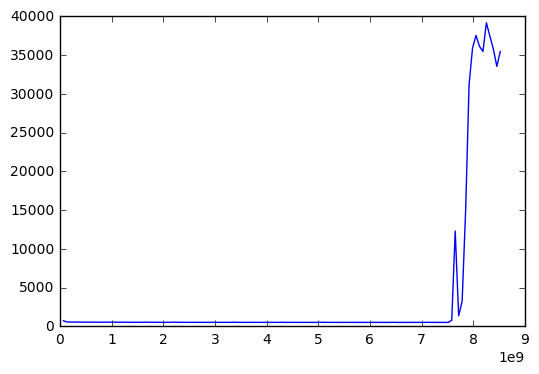

In [33]:
def AnalyzeFileCache(filepath):
    data = LoadData(filepath)
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)

    plt.plot(avg.keys(), avg.values())
    plt.show()
AnalyzeFileCache('filecache.result')
    
    

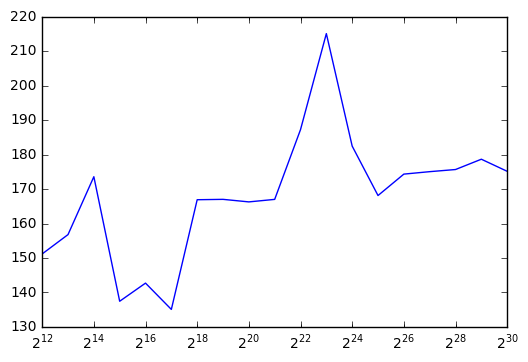

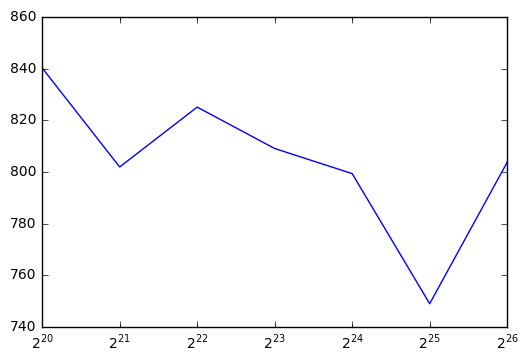

OrderedDict([(4096, 151.1805605141021), (8192, 156.79310960371299), (16384, 173.59668421992146), (32768, 137.44225276686899), (65536, 142.70544002142094), (131072, 135.07167641021064), (262144, 166.91528137272402), (524288, 167.02511379855409), (1048576, 166.28698839432349), (2097152, 167.01399437424135), (4194304, 187.26767138834344), (8388608, 215.14574938182793), (16777216, 182.48555181711887), (33554432, 168.13663286281684), (67108864, 174.35262068421989), (134217728, 175.06327628891466), (268435456, 175.68403156578009), (536870912, 178.67720101802928), (1073741824, 175.16628130890751)])
OrderedDict([(1048576, 840.22183623036415), (2097152, 801.89819344653699), (4194304, 825.07309941619053), (8388608, 809.04873002418776), (16777216, 799.33080740913965), (33554432, 748.9746309148519), (67108864, 803.72156195349874)])


In [49]:
def AnalyzeSeqRead(filepath):
    data = LoadData(filepath)
        
    #filter
    fdata = OrderedDict()
    for k, v in data.iteritems():
        fdata[k] = v[1:]
    data = fdata
    
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)

    plt.semilogx(avg.keys(), avg.values(), label='seq read', basex=2)
    plt.show()
    return avg

seqRead = AnalyzeSeqRead('seqread.result')
rSeqRead = AnalyzeSeqRead('rseqread.result')
print seqRead
print rSeqRead

OrderedDict([(4096, 699867.54730453412), (8192, 672072.5633702249), (16384, 595390.01695822924), (32768, 633791.26874330593), (65536, 655338.47286683321), (131072, 707384.23219385929), (262144, 704072.89667752595), (524288, 713372.22267163498), (1048576, 691058.52297447342), (2097152, 689185.28852704389), (4194304, 730265.83183523733), (8388608, 854248.84658586211), (16777216, 849836.6903395215), (33554432, 853083.01972099242), (67108864, 844703.89191083529), (134217728, 832035.35001651186)])


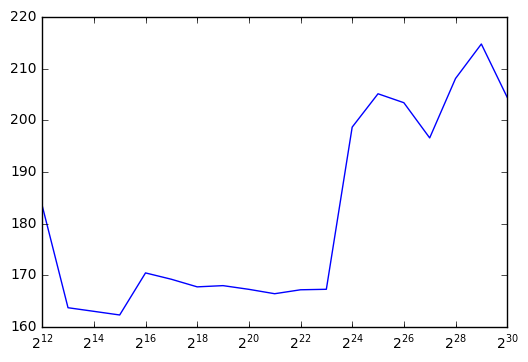

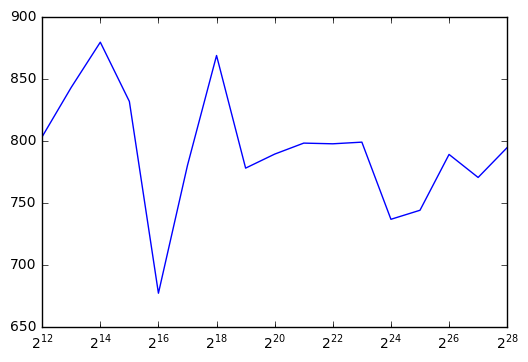

In [48]:
def AnalyzeRandRead(filepath):
    data = LoadData(filepath)
    
    #filter
    fdata = OrderedDict()
    for k, v in data.iteritems():
        fdata[k] = v[2:]
    data = fdata
    
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)

    plt.semilogx(avg.keys(), avg.values(), label='rand read', basex=2)
    plt.show()
    return avg

randRead = AnalyzeRandRead('randread.result')
rRandRead = AnalyzeRandRead('rrandread.result')

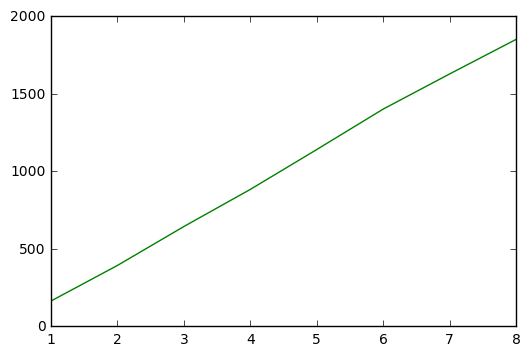

In [52]:
def AnalyzeContentRead(filepath):
    data = LoadData(filepath)
    
    avg = OrderedDict()
    for k, v in data.iteritems():
        avg[k] = np.average(v)
        
    plt.plot(avg.keys(), avg.values(), label='contention read')
    plt.show()
    return avg

contentRead = AnalyzeContentRead('contention.result')